### Random Forest Modeling using Recall as the optimized Metric

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## week 3 imports
import missingno as msno     # msno.bar(titanic);  or msno.matrix(titanic);
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Linear and general modeling imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Feature Engineering
from sklearn.impute import SimpleImputer   # Imputation 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures   # Scale/transform/feature engineering

import patsy
# y, X = patsy.dmatrices(formula, data=diamonds, return_type='dataframe')

# GridSearch and Hyperparameter Tuning
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

# Logistic and Classification metrics
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score, classification_report

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler

# naive bayes imports
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# SVMs
from sklearn.svm import LinearSVC, SVC

# Decision Trees
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Import Bagging, Boosting, and Random Forests, and ExtraTrees (Extremely Randomized Trees)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor

# NLP imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# nltk.download()  --> Download all, and then restart jupyter lab
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
import re

import json


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Prepping the Data

In [2]:
# Loads in the data
df = pd.read_feather('../data/h201.feather')
df.head()

,DUID,PID,DUPERSID,PANEL,FAMID31,FAMID42,FAMID53,FAMID17,FAMIDYR,CPSFAMID,...,RXPTR17,RXOTH17,PERWT17F,FAMWT17F,FAMWT17C,SAQWT17F,DIABW17F,CSAQW17F,VARSTR,VARPSU
0,10001.0,101.0,10001101,21.0,A,A,A,A,A,A,...,2506.0,0.0,13494.959896,13651.501535,13651.501535,18363.716686,0.0,0.0,1021.0,1.0
1,10001.0,102.0,10001102,21.0,A,A,A,A,A,A,...,0.0,0.0,12031.802435,13651.501535,13651.501535,14279.941801,0.0,0.0,1021.0,1.0
2,10001.0,103.0,10001103,21.0,A,A,A,A,A,A,...,135.0,0.0,12308.918980,13651.501535,13651.501535,0.000000,0.0,0.0,1021.0,1.0
3,10001.0,104.0,10001104,21.0,A,A,A,A,A,A,...,0.0,0.0,12280.755977,13651.501535,13651.501535,0.000000,0.0,0.0,1021.0,1.0
4,10002.0,101.0,10002101,21.0,A,A,A,A,A,A,...,0.0,0.0,6596.640550,7113.635349,7113.635349,7427.265851,0.0,0.0,1077.0,1.0


In [3]:
# Loads in health status variables dataframe of variable descriptions
deps = pd.read_csv('../data/Health Status Variables.csv')
deps.head()

,VARIABLE,DESCRIPTION,SOURCE,Activate,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,IADLHP31,IADL Screener – RD 3/1,HE 1-3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADLHLP31,ADL Screener – RD 3/1,HE 4-6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AIDHLP31,Used Assistive Devices – RD 3/1,HE 7-8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WLKLIM31,Limitation in Physical Functioning – RD 3/1,HE 9-10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LFTDIF31,Difficulty Lifting 10 Pounds – RD 3/1,HE 11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Subsets the health status variables for the ones that pertain to children
child_vars = list(deps['VARIABLE'][30:97])
# child_vars

In [5]:
# Creates a list of other variables we want to add
other_vars = ['AGELAST']

In [6]:
# Combines the child variables with additional other variables we want to add
child_vars = child_vars + other_vars
child_vars

['CHPMED42',
 'CHPMHB42',
 'CHPMCN42',
 'CHSERV42',
 'CHSRHB42',
 'CHSRCN42',
 'CHLIMI42',
 'CHLIHB42',
 'CHLICO42',
 'CHTHER42',
 'CHTHHB42',
 'CHTHCO42',
 'CHCOUN42',
 'CHEMPB42',
 'CSHCN42',
 'MOMPRO42',
 'DADPRO42',
 'UNHAP42',
 'SCHLBH42',
 'HAVFUN42',
 'ADUPRO42',
 'NERVAF42',
 'SIBPRO42',
 'KIDPRO42',
 'SPRPRO42',
 'SCHPRO42',
 'HOMEBH42',
 'TRBLE42',
 'CHILCR42',
 'CHILWW42',
 'CHRTCR42',
 'CHRTWW42',
 'CHAPPT42',
 'CHNDCR42',
 'CHENEC42',
 'CHLIST42',
 'CHEXPL42',
 'CHRESP42',
 'CHPRTM42',
 'CHHECR42',
 'CHSPEC42',
 'CHEYRE42',
 'MESHGT42',
 'WHNHGT42',
 'MESWGT42',
 'WHNWGT42',
 'CHBMIX42',
 'MESVIS42',
 'MESBPR42',
 'WHNBPR42',
 'DENTAL42',
 'WHNDEN42',
 'EATHLT42',
 'WHNEAT42',
 'PHYSCL42',
 'WHNPHY42',
 'SAFEST42',
 'WHNSAF42',
 'BOOST42',
 'WHNBST42',
 'LAPBLT42',
 'WHNLAP42',
 'HELMET42',
 'WHNHEL42',
 'NOSMOK42',
 'WHNSMK42',
 'TIMALN42',
 'AGELAST']

In [7]:
# Filters the age of children between 5-17
child_df = df.loc[(df['AGELAST'] <= 17) & (df['AGELAST'] >= 5), child_vars]
child_df

,CHPMED42,CHPMHB42,CHPMCN42,CHSERV42,CHSRHB42,CHSRCN42,CHLIMI42,CHLIHB42,CHLICO42,CHTHER42,...,BOOST42,WHNBST42,LAPBLT42,WHNLAP42,HELMET42,WHNHEL42,NOSMOK42,WHNSMK42,TIMALN42,AGELAST
2,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,...,-1.0,-1.0,1.0,1.0,2.0,-1.0,2.0,-1.0,2.0,17.0
3,1.0,1.0,1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,...,-1.0,-1.0,2.0,-1.0,2.0,-1.0,2.0,-1.0,2.0,14.0
9,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,...,1.0,3.0,-1.0,-1.0,1.0,1.0,2.0,-1.0,-1.0,10.0
13,1.0,1.0,1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,...,-1.0,-1.0,2.0,-1.0,2.0,-1.0,2.0,-1.0,2.0,12.0
14,1.0,1.0,1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,...,2.0,-1.0,-1.0,-1.0,2.0,-1.0,2.0,-1.0,-1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31867,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,...,2.0,-1.0,-1.0,-1.0,2.0,-1.0,1.0,2.0,-1.0,6.0
31870,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,...,1.0,3.0,-1.0,-1.0,1.0,3.0,1.0,3.0,-1.0,9.0
31871,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,...,1.0,3.0,-1.0,-1.0,1.0,3.0,1.0,3.0,-1.0,5.0
31878,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,2.0,...,-1.0,-1.0,2.0,-1.0,2.0,-1.0,2.0,-1.0,1.0,13.0


In [8]:
# Checks the baseline/class balance of target variable
child_df['UNHAP42'].value_counts()

 0.0     4358
 1.0      879
 2.0      499
-1.0      195
 3.0      119
 4.0       65
-7.0       19
-8.0        8
-9.0        7
 99.0       6
Name: UNHAP42, dtype: int64

In [9]:
# filters the target variable to be between 0 and 4
hap_filter =(child_df['UNHAP42'] >= 0) & (child_df['UNHAP42'] <= 4)
child_df = child_df[hap_filter]

In [10]:
# Re-assigns the response variable into binary classes
child_df['UNHAP42'] = child_df['UNHAP42'].map({0:0, 1:1, 2:1, 3:1, 4:1})

<ipython-input-10-a1b61958f7cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_df['UNHAP42'] = child_df['UNHAP42'].map({0:0, 1:1, 2:1, 3:1, 4:1})


In [11]:
# Rechecks the balance/baseline of the target variable
child_df['UNHAP42'].value_counts(normalize=True)

0    0.736149
1    0.263851
Name: UNHAP42, dtype: float64

#### Modeling before balancing classes

**1) All Models**

In [12]:
# Sets up X and y
X = child_df.drop(columns='UNHAP42')
y = child_df['UNHAP42']

In [13]:
# TTS
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    random_state=42)

In [14]:
# Standard Scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Instantiates all default classifier models
logreg = LogisticRegression(random_state=42, solver='liblinear')   # Adjust solver
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
tree_pruned = DecisionTreeClassifier(max_depth=5,  
                                     random_state=42)
svc = SVC(random_state=42)
bagging = BaggingClassifier(random_state=42, 
                            n_estimators=100)
rf = RandomForestClassifier(random_state=42)
rf_pruned = RandomForestClassifier(max_depth=5,
                                   random_state=42)
boost = AdaBoostClassifier(n_estimators=100, 
                           random_state=42)

In [16]:
# Puts all the instantiated classifiers in a list
class_list = [logreg, knn, tree, tree_pruned, svc, bagging, rf, rf_pruned, boost]

In [17]:
# Final full classification function
def modeling_class(class_list, X=None, y=None, use_split_data=False, standard_scale=False, X_train=None, X_test=None, y_train=None, y_test=None):
    import pandas as pd
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score, classification_report
    
    if not use_split_data:
    
        try:
            # train-test-split
            X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                stratify=y,
                                                                random_state=42)
            if standard_scale:
                sc = StandardScaler()
                X_train_sc = sc.fit_transform(X_train)
                X_test_sc = sc.transform(X_test)
                X_train = pd.DataFrame(X_train_sc, columns=X.columns)
                X_test = pd.DataFrame(X_test_sc, columns=X.columns)
                print('Used standard scale')
        except: 
            return 'You need to set "use_split_data"=True if you want to pass already train-test split X and y'
    
    train_acc = []
    test_acc = []
    train_auc = []
    test_auc = []
    f1_train = []
    f1_test = []
    
    test_recall = []

    # for each classifier fit and score
    for classifier in class_list:
        classifier.fit(X_train, y_train)
        train_acc.append(classifier.score(X_train, y_train))
        test_acc.append(classifier.score(X_test, y_test))
        train_auc.append(roc_auc_score(y_true=y_train, y_score=classifier.predict(X_train)))
        test_auc.append(roc_auc_score(y_true=y_test, y_score=classifier.predict(X_test)))
        f1_train.append(f1_score(y_train, classifier.predict(X_train)))
        f1_test.append(f1_score(y_test, classifier.predict(X_test)))
        
        test_recall.append(recall_score(y_test, classifier.predict(X_test)))
        
    # combine into dataframe
    dict_of_list_df = pd.DataFrame({'train_acc': train_acc,
                                    'test_acc': test_acc,
                                    'train_auc': train_auc,
                                    'test_auc': test_auc, 
                                    'f1_train': f1_train,
                                    'f1_test': f1_test,
                                    'test_recall': test_recall},
                                    index=[str(cl) for cl in class_list])

    ####################

#     list_of_dicts = []
#     for classifier in class_list:
#         metrics_dict = {}

#         classifier.fit(X_train, y_train)
#         metrics_dict['train_acc'] = classifier.score(X_train, y_train)
#         metrics_dict['test_acc'] = classifier.score(X_test, y_test)
#         metrics_dict['train_auc'] = roc_auc_score(y_true=y_train, y_score=classifier.predict(X_train))
#         metrics_dict['test_auc'] = roc_auc_score(y_true=y_test, y_score=classifier.predict(X_test))
#         metrics_dict['f1_train'] = f1_score(y_train, classifier.predict(X_train))
#         metrics_dict['f1_test'] = f1_score(y_test, classifier.predict(X_test))

            

#         list_of_dicts.append(metrics_dict)

#     list_of_dicts_df = pd.DataFrame(list_of_dicts,
#                                     index=[str(cl) for cl in class_list])
    
    return dict_of_list_df#, list_of_dicts_df

In [18]:
# Runs the modeling_class function on all the instantiated classifiers in the list, and prints out the scores
modeling_class(class_list, use_split_data=True, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

,train_acc,test_acc,train_auc,test_auc,f1_train,f1_test,test_recall
"LogisticRegression(random_state=42, solver='liblinear')",0.833784,0.824324,0.728112,0.717713,0.615625,0.596273,0.492308
KNeighborsClassifier(),0.820721,0.763514,0.692423,0.622089,0.553311,0.418605,0.323077
DecisionTreeClassifier(random_state=42),1.000000,0.762162,1.000000,0.699388,1.000000,0.556675,0.566667
"DecisionTreeClassifier(max_depth=5, random_state=42)",0.847523,0.822973,0.765902,0.735733,0.672472,0.621387,0.551282
SVC(random_state=42),0.862838,0.818243,0.763993,0.698765,0.680985,0.564019,0.446154
"BaggingClassifier(n_estimators=100, random_state=42)",1.000000,0.830405,1.000000,0.754775,1.000000,0.648951,0.594872
RandomForestClassifier(random_state=42),1.000000,0.841216,1.000000,0.759645,1.000000,0.660895,0.587179
"RandomForestClassifier(max_depth=5, random_state=42)",0.857658,0.828378,0.762663,0.720466,0.675565,0.601881,0.492308
"AdaBoostClassifier(n_estimators=100, random_state=42)",0.854054,0.847297,0.782105,0.773653,0.694915,0.680791,0.617949


**2) Random Forest Model**

In [19]:
# Instantiates the Random Forest Classifier

# rf = RandomForestClassifier(random_state=42)
rf_pruned = RandomForestClassifier(max_depth=5,
                                   random_state=42)

In [20]:
# Fits the data to the pruned random forest
rf_pruned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [21]:
# Evaluates the pruned random forest accuracy scores
rf_pruned.score(X_train, y_train), rf_pruned.score(X_test, y_test)

(0.8576576576576577, 0.8283783783783784)

In [22]:
# Recall Score 
preds = rf_pruned.predict(X_test)
recall_score(y_test, preds) 

0.49230769230769234

**3) Random Forest with GridSearch**

In [23]:
# Instantiates random forest
rf = RandomForestClassifier()

In [24]:
# Sets the gridsearch params
rf_params = {
    'n_estimators': [100, 300, 600],
    'max_depth': [None, 1, 5, 10, 20],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}

In [26]:
# Instantiates the gridsearch
gs = GridSearchCV(rf, 
                  param_grid=rf_params,
                  cv=3,
                  scoring='recall',
                  n_jobs=4)

In [27]:
# Fits the data to the gridsearch model
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [None, 1, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 300, 600]},
             scoring='recall')

In [28]:
# Evaluates the grid search scores
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.8737201365187713, 0.5794871794871795)

In [29]:
# Looks at the best params for the gridsearch model
gs.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [113]:
# Recall Score 
preds = gs.predict(X_test)
recall_score(y_train, gs.predict(X_train)), recall_score(y_test, preds) 

(0.871160409556314, 0.5897435897435898)

**3a) Second Iteration with GridSearch Params Adjusted**

In [31]:
# Runs a gridsearch
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [15, 20, 25, 30],
    'min_samples_split': [1, 2],
    'min_samples_leaf': [2]
}

gs = GridSearchCV(rf, 
                  param_grid=rf_params,
                  cv=3,
                  scoring='recall',
                  verbose=1,
                  n_jobs=4)

gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\snchu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.58274641 0.59381817 0.58699805
        nan        nan        nan 0.58443614 0.58787243 0.59639321
        nan        nan        nan 0.57080027 0.59126719 0.58359237
        nan        nan        nan 0.59041904 0.59126937 0.59041467]
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [15, 20, 25, 30], 'min_samples_leaf': [2],
                         'min_samples_split': [1, 2],
                         'n_estimators': [50, 100, 150]},
             scoring='recall', verbose=1)

In [32]:
# Checks the accuracy scores from the gridsearch model
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.8779863481228669, 0.5897435897435898)

In [33]:
# prints out the best params
gs.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [34]:
# Recall Score 
preds = gs.predict(X_test)
recall_score(y_train, gs.predict(X_train)), recall_score(y_test, preds) 

(0.8779863481228669, 0.5897435897435898)

**3b) Third Iteration with GridSearch Params Adjusted**

In [35]:
# Runs a gridsearch
rf_params = {
    'n_estimators': [130, 150, 170, 190],
    'max_depth': [18, 19, 20, 21],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

gs = GridSearchCV(rf, 
                  param_grid=rf_params,
                  cv=3,
                  verbose=1,
                  scoring='recall',
                  n_jobs=4)

gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [18, 19, 20, 21], 'min_samples_leaf': [2],
                         'min_samples_split': [2],
                         'n_estimators': [130, 150, 170, 190]},
             scoring='recall', verbose=1)

In [36]:
# Evaluates gridsearch recall scores
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.8771331058020477, 0.5794871794871795)

In [37]:
# Best params
gs.best_params_

{'max_depth': 21,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 170}

In [38]:
# Recall Score 
preds = gs.predict(X_test)
recall_score(y_train, gs.predict(X_train)), recall_score(y_test, preds) 

(0.8771331058020477, 0.5794871794871795)

**3c) Fourth Iteration with GridSearch Params Adjusted**

In [60]:
# Runs a gridsearch
rf_params = {
    'n_estimators': [165, 170, 175, 180],
    'max_depth': [20, 21, 22, 23, 24],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

gs = GridSearchCV(rf, 
                  param_grid=rf_params,
                  cv=3,
                  verbose=1,
                  scoring='recall',
                  n_jobs=4)

gs.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [20, 21, 22, 23, 24],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [165, 170, 175, 180]},
             scoring='recall', verbose=1)

In [61]:
# Checks gridsearch recall scores
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.8762798634812287, 0.6102564102564103)

In [62]:
# Best params
gs.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 180}

In [63]:
# Recall Score 
preds = gs.predict(X_test)
recall_score(y_train, gs.predict(X_train)), recall_score(y_test, preds) 

(0.8762798634812287, 0.6102564102564103)

**3d) Fifth Iteration with GridSearch Params Adjusted**

In [43]:
# Runs a gridsearch
rf_params = {
    'n_estimators': [175, 180, 185, 190],
    'max_depth': [18, 19, 20, 21],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

gs = GridSearchCV(rf, 
                  param_grid=rf_params,
                  cv=3,
                  verbose=1,
                  scoring='recall',
                  n_jobs=4)

gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [18, 19, 20, 21], 'min_samples_leaf': [2],
                         'min_samples_split': [2],
                         'n_estimators': [175, 180, 185, 190]},
             scoring='recall', verbose=1)

In [44]:
# Checks recall scores from gridsearch
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.8754266211604096, 0.5948717948717949)

In [45]:
# Check best params
gs.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 185}

In [46]:
# Recall Score 
preds = gs.predict(X_test)
recall_score(y_train, gs.predict(X_train)), recall_score(y_test, preds) 

(0.8754266211604096, 0.5948717948717949)

**3e) Sixth Iteration with GridSearch Params Adjusted**

In [48]:
# Runs a gridsearch
rf_params = {
    'n_estimators': [180, 181, 182, 183, 184, 185, 186, 187, 188],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}
gs = GridSearchCV(rf, 
                  param_grid=rf_params,
                  cv=3,
                  verbose=1,
                  scoring='recall',
                  n_jobs=4)

gs.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [20], 'min_samples_leaf': [2],
                         'min_samples_split': [2],
                         'n_estimators': [180, 181, 182, 183, 184, 185, 186,
                                          187, 188]},
             scoring='recall', verbose=1)

In [49]:
# Checks recall gridsearch scores
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.8805460750853242, 0.5769230769230769)

In [50]:
# prints best params
gs.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 185}

In [51]:
# Recall Score 
preds = gs.predict(X_test)
recall_score(y_train, gs.predict(X_train)), recall_score(y_test, preds) 

(0.8805460750853242, 0.5769230769230769)

**3g) Final Random Forest model with optimized parameters**

In [64]:
# Instantiates optimized random forest
rf_pruned = RandomForestClassifier(max_depth=20,
                                   min_samples_leaf=2,
                                   min_samples_split=2,
                                   n_estimators=180)

In [65]:
# fit the pruned random forest
rf_pruned.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=180)

In [66]:
# Evaluates accuracy scores
rf_pruned.score(X_train, y_train), rf_pruned.score(X_test, y_test)

(0.9650900900900901, 0.8405405405405405)

In [72]:
# Recall Score 
preds = rf_pruned.predict(X_test)
recall_score(y_train, rf_pruned.predict(X_train)), recall_score(y_test, preds) 

(0.8779863481228669, 0.5717948717948718)

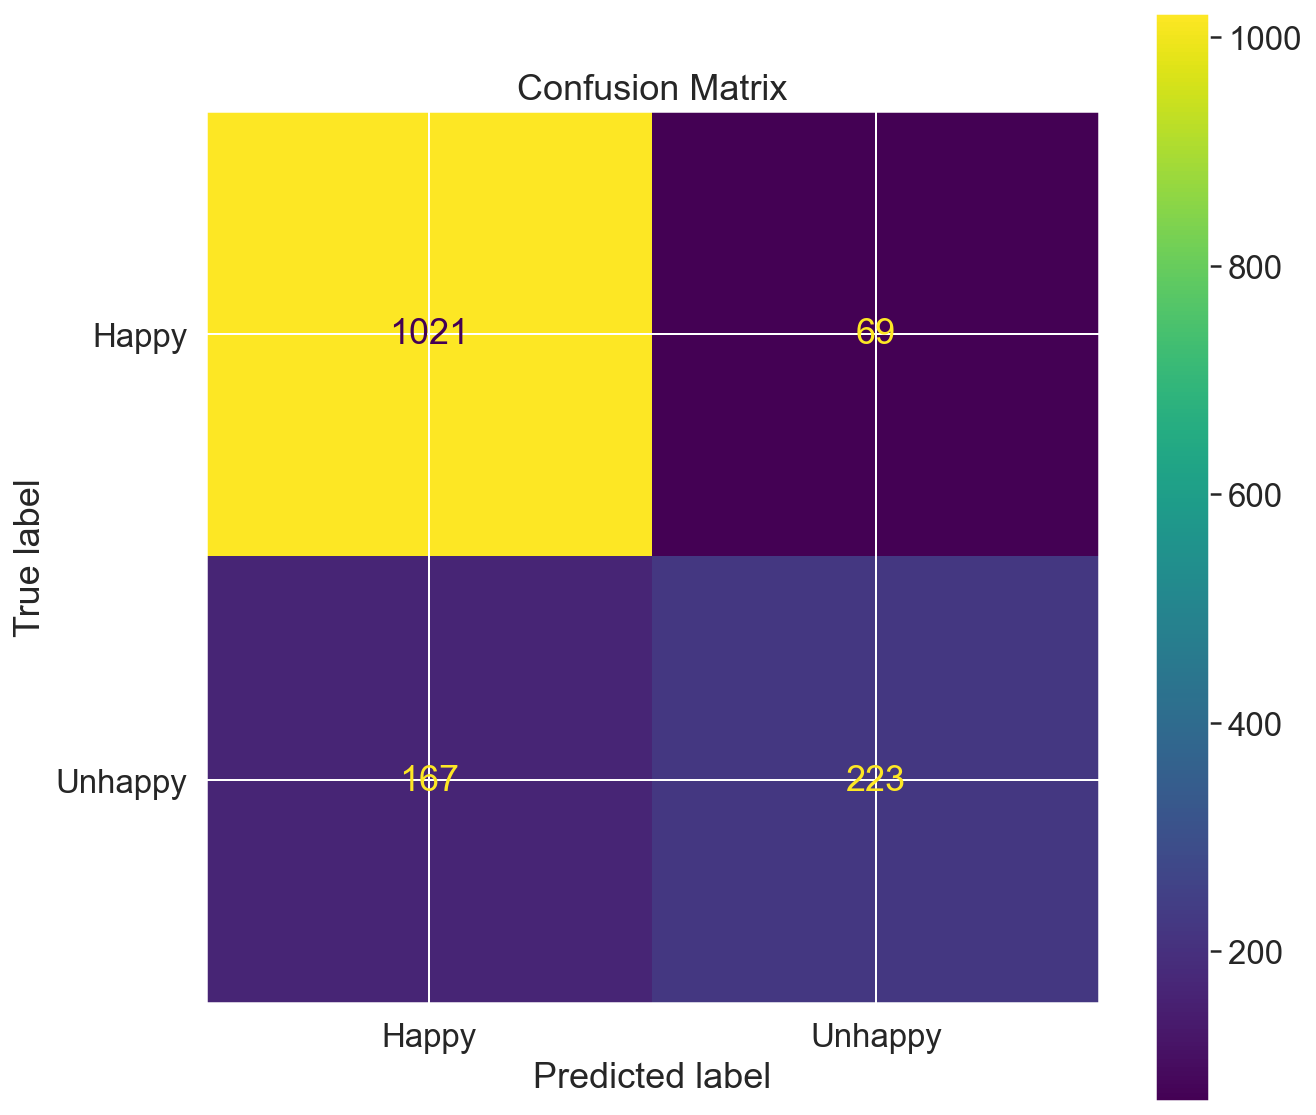

In [73]:
# Confusion matrix with pipe model predictions
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, preds)
fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay(cm).plot(ax=ax)
plt.title('Confusion Matrix')
ax.set_xticklabels(['Happy', 'Unhappy'])
ax.set_yticklabels(['Happy', 'Unhappy']);

**Interpretation** - There's a lot of false negatives in this confusion matrix, which is pulling down the recall score

In [76]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1090
           1       0.76      0.57      0.65       390

    accuracy                           0.84      1480
   macro avg       0.81      0.75      0.78      1480
weighted avg       0.83      0.84      0.83      1480



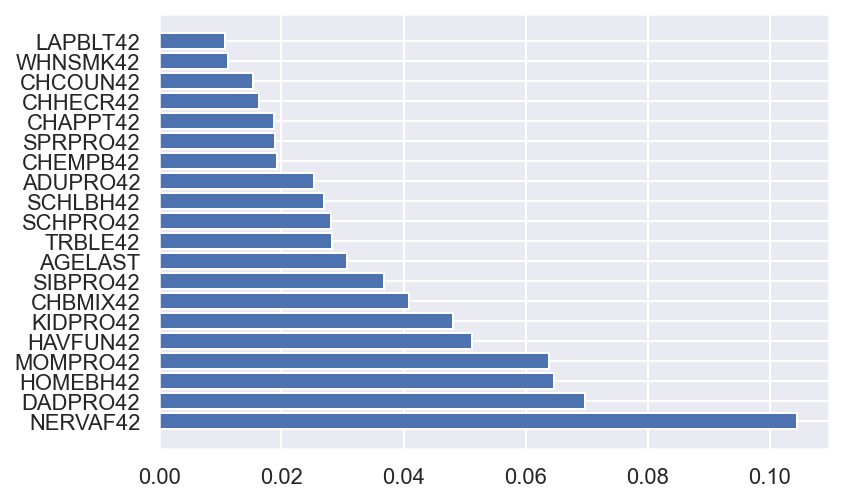

In [75]:
# The feature importances 
features = X.columns
feat_imp = rf_pruned.feature_importances_
sns.set(font_scale=1.0)
importance_dict = pd.DataFrame({'feature_importance': feat_imp,
                                'features': features})
top = importance_dict.nlargest(20, columns=['feature_importance'])

plt.barh(top['features'], top['feature_importance']);
plt.savefig('../charts_graphs/rf_recall_featImp.jpg')

**Interpretation** - Home behavior, and household relationships show significant correlation with our response variable - unhappiness